In [1]:
import geopandas as gpd
#import pandas as pd
import os
import pydeck as pdk

In [2]:
# read shapefile
gpd_df = gpd.read_file(
    os.path.join(os.path.dirname("__file__"), "shp/cambridge_locations.shp")
)

In [3]:
gpd_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
gpd_2d_df = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(
        gpd_df.geometry.x,
        gpd_df.geometry.y
    )
)

In [5]:
gpd_2d_df

,geometry
0,POINT (-71.10424 42.37452)
1,POINT (-71.08696 42.37283)
2,POINT (-71.10424 42.37452)
3,POINT (-71.11168 42.37434)
4,POINT (-71.11188 42.36984)
5,POINT (-71.11328 42.36584)
6,POINT (-71.10694 42.35931)
7,POINT (-71.10237 42.36081)
8,POINT (-71.09156 42.36453)
9,POINT (-71.09005 42.36621)


We aggregate multiple individual points in 24 rows of a dataframe into individual points in a 1 row dataframe using the method `dissolve` as described in [Aggregation with dissolve — GeoPandas 1.0.1+0.g747d66e.dirty documentation](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html)

In [6]:
gpd_polygon_df = gpd_2d_df.dissolve()
gpd_polygon_df

,geometry
0,"MULTIPOINT ((-71.11328 42.36584), (-71.11188 4..."


We plot the points below

<Axes: >

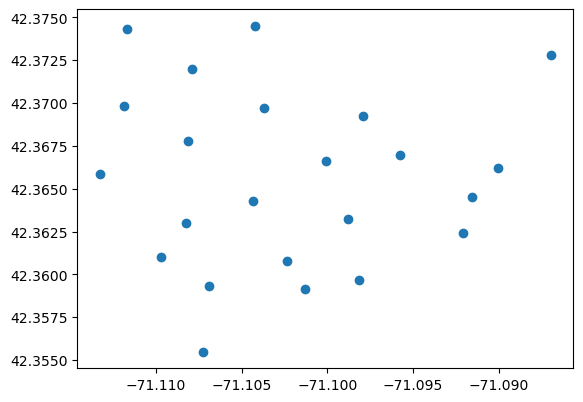

In [7]:
gpd_polygon_df.plot()

We plot the points of the concave hull. Concave hull is described in [geopandas.GeoSeries.concave_hull — GeoPandas 1.0.1+0.g747d66e.dirty documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.concave_hull.html#geopandas.GeoSeries.concave_hull).

<Axes: >

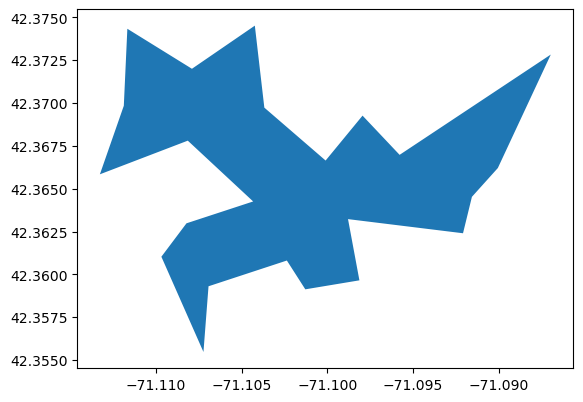

In [8]:
gpd_polygon_df.concave_hull().plot()

We plot the points of the convex hull. Convex hull is described in [geopandas.GeoSeries.convex_hull — GeoPandas 1.0.1+0.g747d66e.dirty documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.convex_hull.html#geopandas.GeoSeries.convex_hull).

<Axes: >

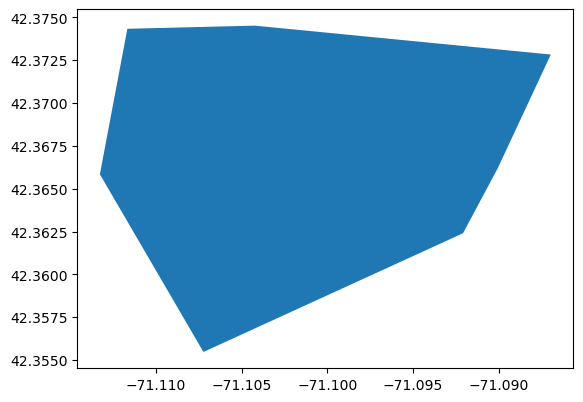

In [9]:
gpd_polygon_df.convex_hull.plot()

In [10]:
gpd_polygon_df.geometry.centroid

0    POINT (-71.10228 42.3656)
dtype: geometry

In [11]:
gpd_polygon_df.minimum_bounding_circle()

0    POLYGON ((-71.08577 42.3672, -71.08604 42.3644...
dtype: geometry

In [12]:
gpd_polygon_df.minimum_bounding_circle().centroid

0    POINT (-71.09971 42.3672)
dtype: geometry

In [13]:
gpd_polygon_df.minimum_bounding_radius()

0    0.013938
dtype: float64

We plot the points of the minimum bounding circle. Minimum bounding circle is described in [geopandas.GeoSeries.minimum_bounding_circle — GeoPandas 1.0.1+0.g747d66e.dirty documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.minimum_bounding_circle.html#geopandas.GeoSeries.minimum_bounding_circle).

<Axes: >

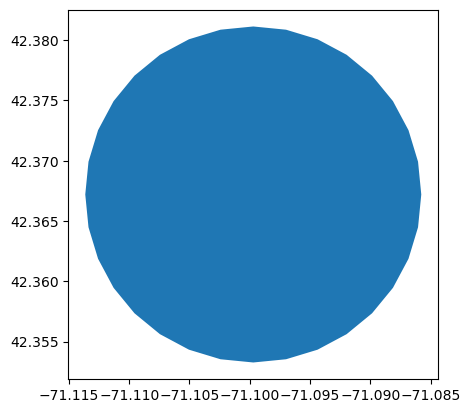

In [14]:
gpd_polygon_df.minimum_bounding_circle().plot()

We plot the envelope (i.e. smallest rectangle around points). The envelope is described in [geopandas.GeoSeries.envelope — GeoPandas 1.0.1+0.g747d66e.dirty documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.envelope.html#geopandas.GeoSeries.envelope).

<Axes: >

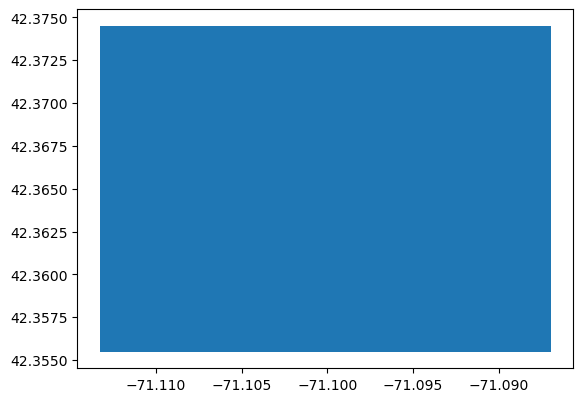

In [15]:
gpd_polygon_df.envelope.plot()

# PyDeck Plots

In [16]:
polygon_layer = pdk.Layer(
    "GeoJsonLayer",
    gpd_polygon_df,
    get_fill_color=[0, 0, 255],
    get_point_radius=5
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-71.09971,
    latitude=42.3672,
    zoom=13,
    min_zoom=1,
    max_zoom=30
)

pdk.Deck(
    map_style="light",
    layers=[polygon_layer], 
    initial_view_state = view_state
).show()


In [17]:
polygon_hull_layer = pdk.Layer(
    "GeoJsonLayer",
    gpd_polygon_df.concave_hull(),
    get_fill_color=[0, 0, 255],
    get_point_radius=5
)


pdk.Deck(
    map_style="light",
    layers=[polygon_hull_layer], 
    initial_view_state = view_state
).show()


In [18]:
polygon_convex_layer = pdk.Layer(
    "GeoJsonLayer",
    gpd_polygon_df.convex_hull,
    get_fill_color=[0, 0, 255],
    get_point_radius=5
)


pdk.Deck(
    map_style="light",
    layers=[polygon_convex_layer], 
    initial_view_state = view_state
).show()


In [19]:
polygon_circle_layer = pdk.Layer(
    "GeoJsonLayer",
    gpd_polygon_df.minimum_bounding_circle(),
    get_fill_color=[0, 0, 255],
    get_point_radius=5
)


pdk.Deck(
    map_style="light",
    layers=[polygon_circle_layer], 
    initial_view_state = view_state
).show()


In [20]:
polygon_rectabgle_layer = pdk.Layer(
    "GeoJsonLayer",
    gpd_polygon_df.envelope,
    get_fill_color=[0, 0, 255],
)


pdk.Deck(
    map_style="light",
    layers=[polygon_rectabgle_layer], 
    initial_view_state = view_state
).show()
